In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
plt.rc('figure', figsize=(10, 5))

In [2]:
#alterar eleitores por eleição

eleitores = 135539919

In [16]:
names = ['TRASH1', 'TRASH2', 'TRASH3', 'NR_TURNO', 'TRASH4',
'TRASH5', 'TRASH6', 'TRASH7', 'TRASH8', 'TRASH9', 'TRASH10', 'TRASH11',
'TRASH12', 'TRASH13', 'NM_URNA_CANDIDATO', 'DS_CARGO', 'TRASH14', 'TRASH15',
'TRASH16', 'TRASH17', 'TRASH18', 'TRASH19', 'TRASH20', 'SG_PARTIDO', 'TRASH21',
'TRASH22', 'TRASH23', 'TRASH24', 'QT_VOTOS_NOMINAIS']

In [17]:
df = pd.read_csv('votacao_candidato_munzona_2010_BR.txt', names = names, sep = ';', encoding='latin-1')

In [18]:
df.sample(1)

,TRASH1,TRASH2,TRASH3,NR_TURNO,TRASH4,TRASH5,TRASH6,TRASH7,TRASH8,TRASH9,TRASH10,TRASH11,TRASH12,TRASH13,NM_URNA_CANDIDATO,DS_CARGO,TRASH14,TRASH15,TRASH16,TRASH17,TRASH18,TRASH19,TRASH20,SG_PARTIDO,TRASH21,TRASH22,TRASH23,TRASH24,QT_VOTOS_NOMINAIS
39431,29/07/2015,18:27:41,2010,1,ELEIÇÕES 2010,SC,81728,81728,BALNEÁRIO ARROIO DO SILVA,1,1,16,280000000003,JOSÉ MARIA DE ALMEIDA,ZÉ MARIA,PRESIDENTE,12,APTO,2,DEFERIDO,4,NÃO ELEITO,16,PSTU,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,280000000002,#NULO#,#NE#,3


In [19]:

droplist = ['TRASH1', 'TRASH2', 'TRASH3', 'TRASH4',
'TRASH5', 'TRASH6', 'TRASH7', 'TRASH8', 'TRASH9', 'TRASH10', 'TRASH11',
'TRASH12', 'TRASH13', 'TRASH14', 'TRASH15',
'TRASH16', 'TRASH17', 'TRASH18', 'TRASH19', 'TRASH20', 'TRASH21',
'TRASH22', 'TRASH23', 'TRASH24']




In [20]:
df = df.drop(droplist, axis = 1)

In [21]:
df.sample(2)

,NR_TURNO,NM_URNA_CANDIDATO,DS_CARGO,SG_PARTIDO,QT_VOTOS_NOMINAIS
24954,1,IVAN PINHEIRO,PRESIDENTE,PCB,7
8693,1,IVAN PINHEIRO,PRESIDENTE,PCB,2


### Filtro por Cargo

In [68]:
dfpresidente = df[df.DS_CARGO == 'PRESIDENTE']

# Primeiro Turno

In [69]:
#Escolher Turno
dfpresidente1turno = dfpresidente[dfpresidente.NR_TURNO == 1]
#Grupar por
votostotais1turno = dfpresidente1turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais1turno['Porcentagem'] = votostotais1turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais1turno = votostotais1turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v1 = votostotais1turno.QT_VOTOS_NOMINAIS.sum()

In [70]:
#Criação de Outros e mostrando somente os 5 primeiros

outros1 = votostotais1turno.QT_VOTOS_NOMINAIS[5:100].sum()
outros1p = votostotais1turno.Porcentagem[5:100].sum()

votostotais1turno = votostotais1turno[0:5].append({'SG_PARTIDO' : 'Outros' , 'NM_URNA_CANDIDATO' : 'Outros', 'QT_VOTOS_NOMINAIS' : outros1, 'Porcentagem' : outros1p } , ignore_index=True)

votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PT,DILMA,47651434,35.156753
1,PSDB,JOSÉ SERRA,33132283,24.444668
2,PV,MARINA SILVA,19636359,14.487510
3,PSOL,PLÍNIO,886816,0.654284
4,PSDC,EYMAEL,89350,0.065922
5,Outros,Outros,193911,0.143066


([<matplotlib.patches.Wedge at 0x1bbce4db1c8>,
 [Text(-0.7789845417234431, -0.7766486230953593, 'Votos Totais'),
  Text(0.8498012389181976, 0.8472531229408934, 'Não Votaram')],
 [Text(-0.424900659121878, -0.4236265216883778, '75.0%'),
  Text(0.4957173893689486, 0.4942309883821878, '25.0%')])

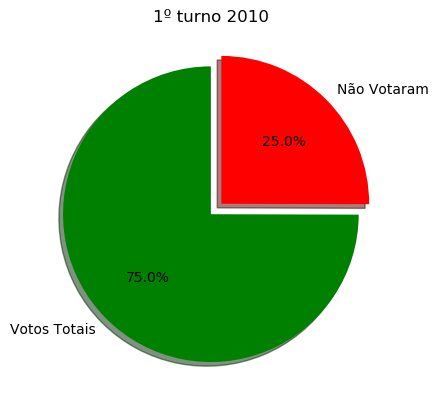

In [71]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = 'Votos Totais', 'Não Votaram'
sizes = [v1, (eleitores-v1)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('1º turno 2010')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)


([<matplotlib.patches.Wedge at 0x1bbcda5f688>,
 [Text(-1.1943340540228182, 0.1164738915011429, 'DILMA'),
  Text(0.8118429923759759, -0.7422337608395493, 'JOSÉ SERRA'),
  Text(0.691335044078524, 0.8556026278763673, 'MARINA SILVA'),
  Text(0.08087060520568934, 1.7981824004292961, 'PLÍNIO'),
  Text(0.025084468820026608, 1.6998149221088799, 'EYMAEL'),
  Text(0.009594326292018479, 1.5999712337735958, 'Outros')],
 [Text(-0.6966948648466439, 0.06794310337566668, '46.9%'),
  Text(0.4428234503868959, -0.4048547786397541, '32.6%'),
  Text(0.37709184222464937, 0.4666923424780185, '19.3%'),
  Text(0.05840654820410897, 1.298687289198936, '0.9%'),
  Text(0.01770668387295996, 1.1998693567827385, '0.1%'),
  Text(0.006596099325762704, 1.099980223219347, '0.2%')])

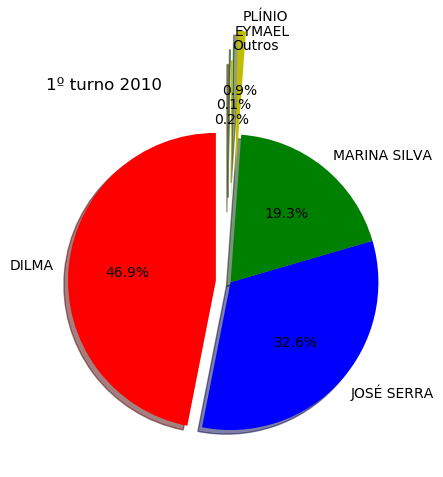

In [72]:
#Grafico de Pizza
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = votostotais1turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.1, 0.0, 0.0, 0.7, 0.6, 0.5)
colors = ('r', 'b', 'g', 'y', 'g', 'y')

plt.pyplot.title('1º turno 2010', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)


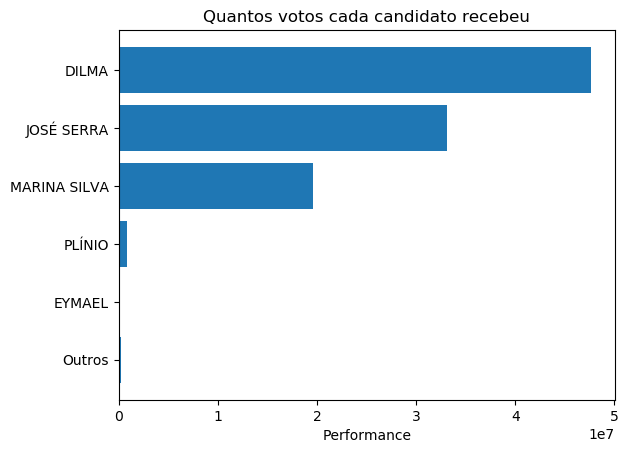

In [73]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais1turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

# Segundo Turno

In [74]:
#Escolher Turno
dfpresidente2turno = dfpresidente[dfpresidente.NR_TURNO == 2]
#Grupar por
votostotais2turno = dfpresidente2turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais2turno['Porcentagem'] = votostotais2turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais2turno = votostotais2turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v2 = votostotais2turno.QT_VOTOS_NOMINAIS.sum()

([<matplotlib.patches.Wedge at 0x1bbcdb38cc8>,
 [Text(-0.8162985826867918, -0.7373307425460675, 'Votos Totais'),
  Text(0.8905075447492276, 0.8043608100502552, 'Não Votaram')],
 [Text(-0.44525377237461367, -0.40218040502512764, '73.4%'),
  Text(0.5194627344370494, 0.4692104725293155, '26.6%')])

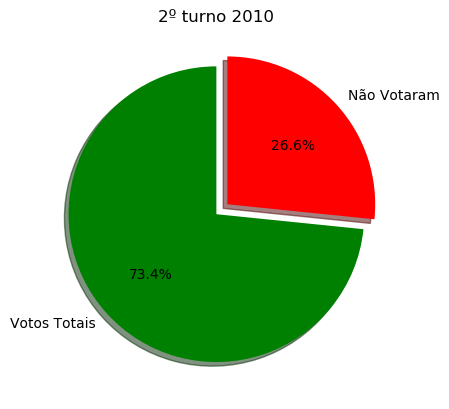

In [75]:
#Grafico de Pizza

labels = 'Votos Totais', 'Não Votaram'
sizes = [v2, (eleitores-v2)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('2º turno 2010')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)

In [76]:
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
1,PT,DILMA,55752529,41.133660
0,PSDB,JOSÉ SERRA,43711388,32.249826


([<matplotlib.patches.Wedge at 0x1bbcea8c3c8>,
 [Text(-1.0801711588975287, -0.2079188964138906, 'DILMA'),
  Text(1.0801711783642958, 0.20791879528096693, 'JOSÉ SERRA')],
 [Text(-0.589184268489561, -0.11341030713484941, '56.1%'),
  Text(0.5891842791077977, 0.11341025197143649, '43.9%')])

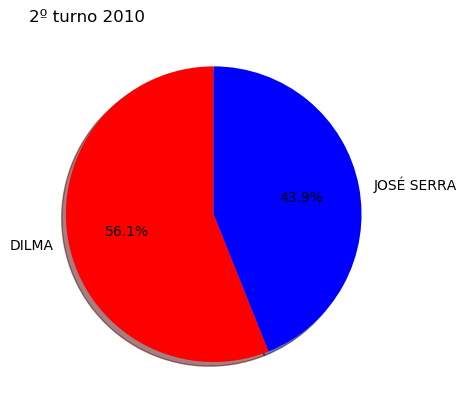

In [77]:
#Grafico de Pizza

labels = votostotais2turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()
#explode = (0.0, 0.1)
colors = ('r','b')

plt.pyplot.title('2º turno 2010', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)

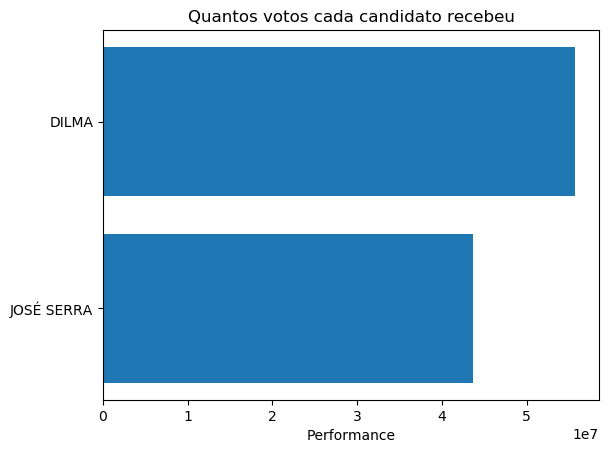

In [78]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais2turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

In [79]:
votostotais2turno = votostotais2turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v2), 
                                              'Porcentagem' : 100-votostotais2turno.Porcentagem.sum() } , ignore_index=True)
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PT,DILMA,55752529,41.133660
1,PSDB,JOSÉ SERRA,43711388,32.249826
2,Não Votaram,Não Votaram,36076002,26.616514


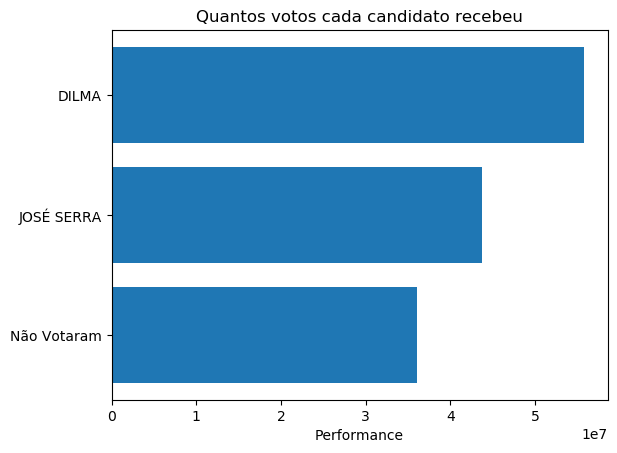

In [80]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais2turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

([<matplotlib.patches.Wedge at 0x1bbcee17e48>,
 [Text(-1.0576023868510844, 0.30245196532158497, 'DILMA'),
  Text(0.5285074141413802, -1.0773485569664034, 'JOSÉ SERRA'),
  Text(0.8905075447492276, 0.8043608100502552, 'Não Votaram')],
 [Text(-0.5768740291915005, 0.16497379926631905, '41.1%'),
  Text(0.3082959915824718, -0.6284533248970686, '32.2%'),
  Text(0.5194627344370494, 0.4692104725293155, '26.6%')])

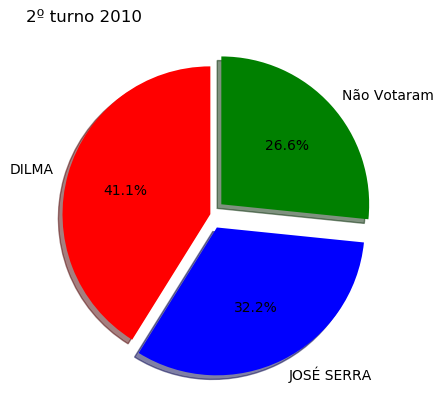

In [81]:
#Grafico de Pizza

labels = votostotais2turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.0, 0.1, 0.1)
colors = ('r','b','g')

plt.pyplot.title('2º turno 2010', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)

In [82]:
votostotais1turno = votostotais1turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v1), 
                                              'Porcentagem' : 100-votostotais1turno.Porcentagem.sum() } , ignore_index=True)
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PT,DILMA,47651434,35.156753
1,PSDB,JOSÉ SERRA,33132283,24.444668
2,PV,MARINA SILVA,19636359,14.487510
3,PSOL,PLÍNIO,886816,0.654284
4,PSDC,EYMAEL,89350,0.065922
5,Outros,Outros,193911,0.143066
6,Não Votaram,Não Votaram,33949766,25.047799


# Salvar os Arquivos CSV

In [83]:
votostotais1turno['Ano'] = 2010
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PT,DILMA,47651434,35.156753,2010
1,PSDB,JOSÉ SERRA,33132283,24.444668,2010
2,PV,MARINA SILVA,19636359,14.487510,2010
3,PSOL,PLÍNIO,886816,0.654284,2010
4,PSDC,EYMAEL,89350,0.065922,2010
5,Outros,Outros,193911,0.143066,2010
6,Não Votaram,Não Votaram,33949766,25.047799,2010


In [84]:
votostotais1turno.to_csv('1turno_2010.csv')

In [85]:
votostotais2turno['Ano'] = 2010
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PT,DILMA,55752529,41.133660,2010
1,PSDB,JOSÉ SERRA,43711388,32.249826,2010
2,Não Votaram,Não Votaram,36076002,26.616514,2010


In [86]:
votostotais2turno.to_csv('2turno_2010.csv')